<a href="https://colab.research.google.com/github/Swayamprakashpatel/PU_DL/blob/main/Powderblend_DeepLearning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.applications.imagenet_utils import decode_predictions

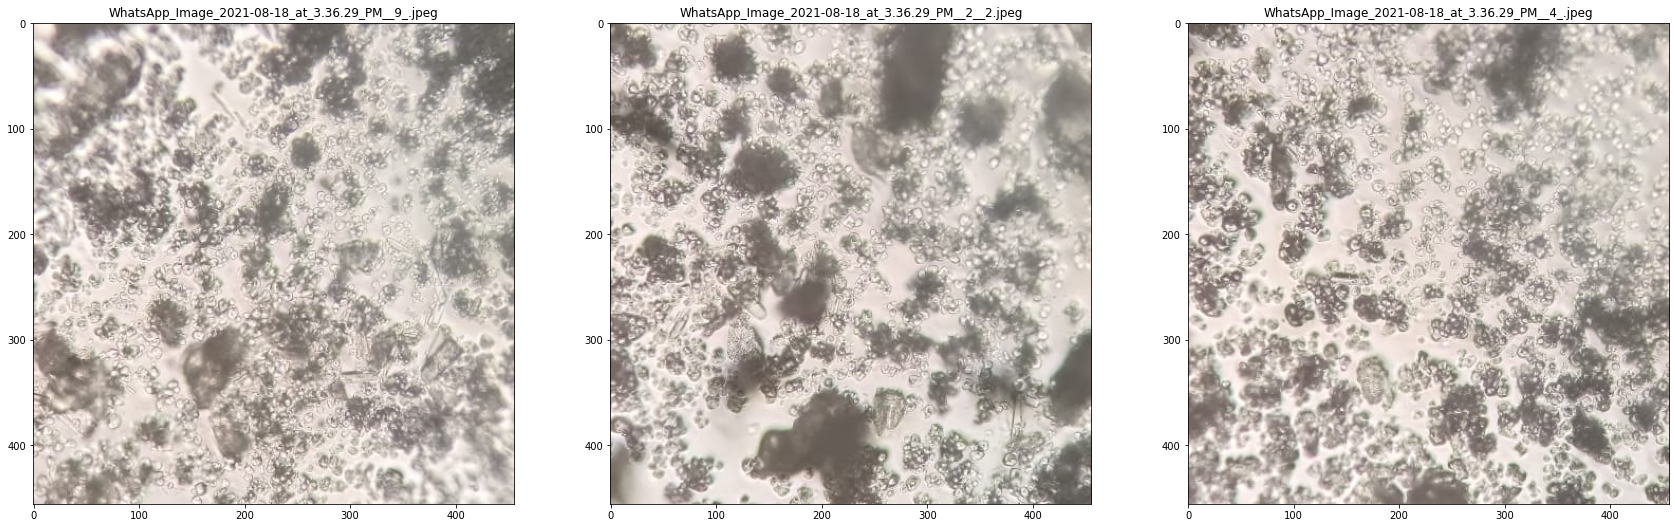

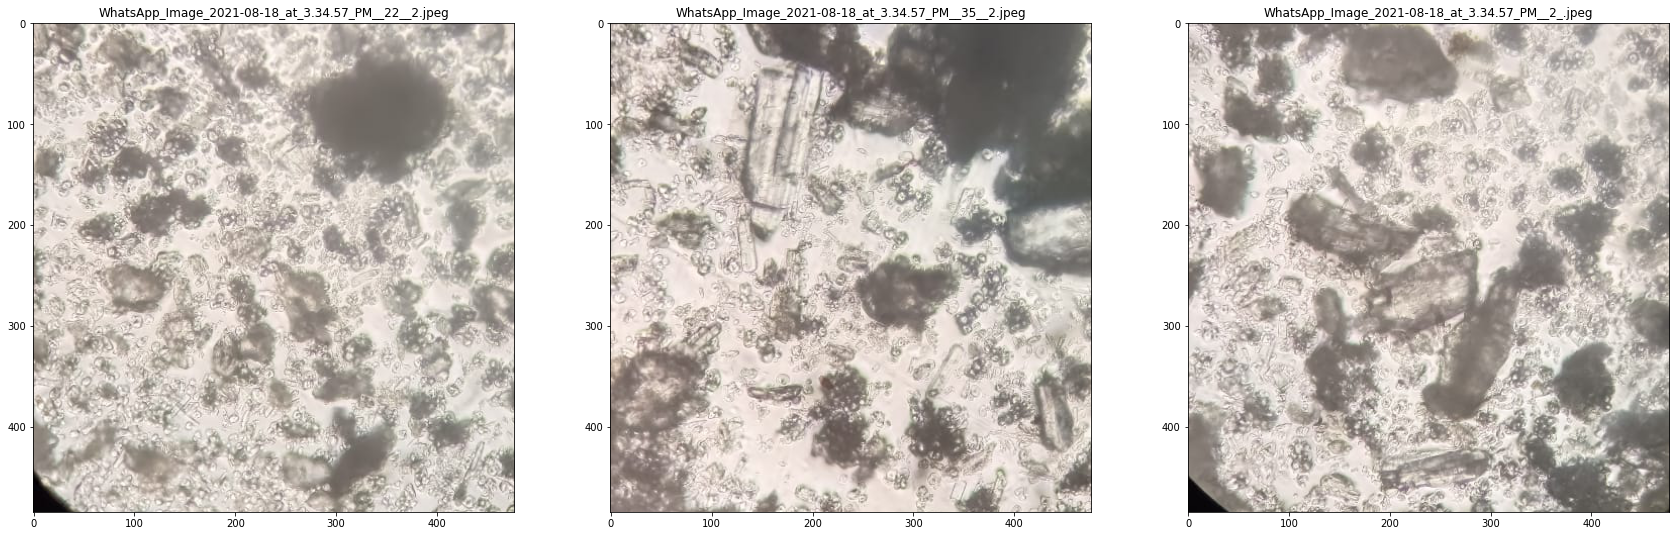

In [ ]:
#Set Batch Size and Image Height and Image Width
batch_size = 10
IMG_HEIGHT, IMG_WIDTH = (50,50)


# Show image after Size Setting (Reduction)

# Images of Not Mixed Powder Samples
plt.figure(figsize=(IMG_HEIGHT,IMG_WIDTH))
img_folder=r'/content/drive/MyDrive/Model_DE/Model Try/NOT MIXED'
for i in range(3):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path,cv2.COLOR_RGB2BGR)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

# Images of Mixed Powder Samples
plt.figure(figsize=(IMG_HEIGHT,IMG_WIDTH))
img_folder=r'/content/drive/MyDrive/Model_DE/Model Try/MIXED'
for i in range(3):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=mpimg.imread(image_path,cv2.COLOR_RGB2BGR)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
#Directories with Subdirectories as Classes for training and validation datasets

train_dir = '/content/drive/MyDrive/Model_DE/Model Try'
validation_dir = '/content/drive/MyDrive/Model_DE/Model Try'

In [ ]:
#Image to Data Transform using ImageDataGenerator of Keras

#Image to Data for Training Data
Dataset_Image_Training = ImageDataGenerator(rescale = 1./255)
train_data_gen =  Dataset_Image_Training.flow_from_directory(
                    batch_size= batch_size,
                    directory=train_dir,
                    shuffle=True,
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    class_mode='binary',
                    )
#Image to Data for Validation Data
validation_image_generator = ImageDataGenerator(rescale=1./255)
val_data_gen = validation_image_generator.flow_from_directory(
                 batch_size=batch_size,
                 directory= validation_dir,
                 shuffle=True,
                 target_size=(IMG_HEIGHT,IMG_WIDTH),
                 class_mode= 'binary')
#Check Classes in Dataset
train_data_gen.class_indices

Found 154 images belonging to 2 classes.
Found 154 images belonging to 2 classes.


{'MIXED': 0, 'NOT MIXED': 1}

In [ ]:
#Deep Learning CNN Model with Keras Seqential

model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')])

# Model Compilation
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Checkpoint and earlystop setting
filepath = '/content/drive/My Drive/DL_Model.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', mode='max', save_best_only=True, Save_weights_only = False, verbose = 1), 
              tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=25, verbose =1)]

#Model Fitting
history = model.fit(
    train_data_gen,
    steps_per_epoch=None,
    epochs=500,
    validation_data=val_data_gen,
    validation_steps=None,
    callbacks = [checkpoint],
)

Epoch 1/500
16/16 [==============================] - 33s 2s/step - loss: 0.7085 - accuracy: 0.4935 - val_loss: 0.6927 - val_accuracy: 0.5065

Epoch 00001: val_accuracy improved from -inf to 0.50649, saving model to /content/drive/My Drive/DL_Model.hdf5
Epoch 2/500
16/16 [==============================] - 3s 197ms/step - loss: 0.6942 - accuracy: 0.4935 - val_loss: 0.6927 - val_accuracy: 0.4935

Epoch 00002: val_accuracy did not improve from 0.50649
Epoch 3/500
16/16 [==============================] - 3s 194ms/step - loss: 0.6936 - accuracy: 0.5065 - val_loss: 0.6923 - val_accuracy: 0.5065

Epoch 00003: val_accuracy did not improve from 0.50649
Epoch 4/500
16/16 [==============================] - 3s 192ms/step - loss: 0.6933 - accuracy: 0.4610 - val_loss: 0.6909 - val_accuracy: 0.7922

Epoch 00004: val_accuracy improved from 0.50649 to 0.79221, saving model to /content/drive/My Drive/DL_Model.hdf5
Epoch 5/500
16/16 [==============================] - 3s 193ms/step - loss: 0.6852 - accurac

In [ ]:
#Predictionn

Pred_Dir = '/content/drive/MyDrive/Model_DE/Test'
Prediction = ImageDataGenerator(rescale = 1./255)
Pred_Data =  Prediction.flow_from_directory(
                    directory=Pred_Dir,
                    batch_size= batch_size,
                    shuffle=False,
                    target_size=(IMG_HEIGHT,IMG_WIDTH),
                    class_mode=None)
#Pred_Data.reset()

Prediction = np.round(model.predict(Pred_Data))
k = print(Prediction)
train_data_gen.class_indices

Found 1 images belonging to 1 classes.


NameError: ignored